In [1]:
#!pip3 install albumentations

In [2]:
# Initialized Logger
import torch
import torch.optim as optim
from torchvision import datasets
import albumentations as A
from torchsummary import summary
from src.model import Net
from src.utils import get_device, \
                  fit_model, plot_accuracy_report, \
                  show_random_results, plot_misclassified, \
                  calculate_accuracy_per_class
from src.dataset import dataset_stats,\
                        visualize_images,\
                        visualize_augmentated_images,\
                        AlbumentationImageDataset

CODE BLOCK: 2

In [3]:
# CUDA?
device = get_device()
print("Available Device :: ", device)

INFO:src.utils:device: cuda


Available Device ::  cuda


CODE BLOCK: 3

In [4]:
sample = datasets.CIFAR10('./data',train=True,download=True)
sample_data = sample.data

mean,std,var = dataset_stats(sample_data)
print(f"SHAPE of Images {sample_data.shape}")
print(f"MEAN of dataset {mean}")
print(f"STD of dataset {std}")
print(f"VAR of dataset {var}")

Files already downloaded and verified
SHAPE of Images (50000, 32, 32, 3)
MEAN of dataset [0.49139968 0.48215841 0.44653091]
STD of dataset [0.24703223 0.24348513 0.26158784]
VAR of dataset [15.56135559 15.11767693 17.44919073]


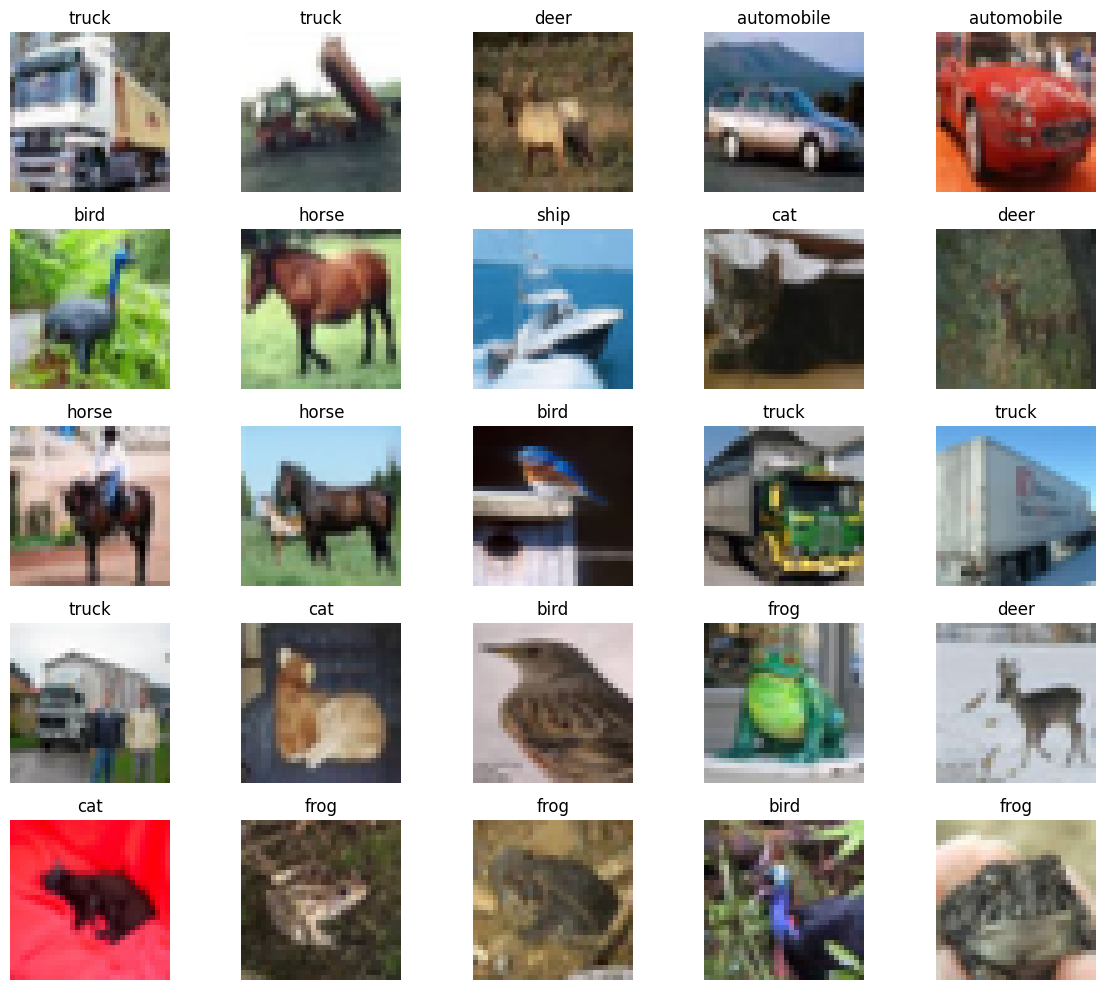

In [5]:
visualize_images(sample,(5,5))

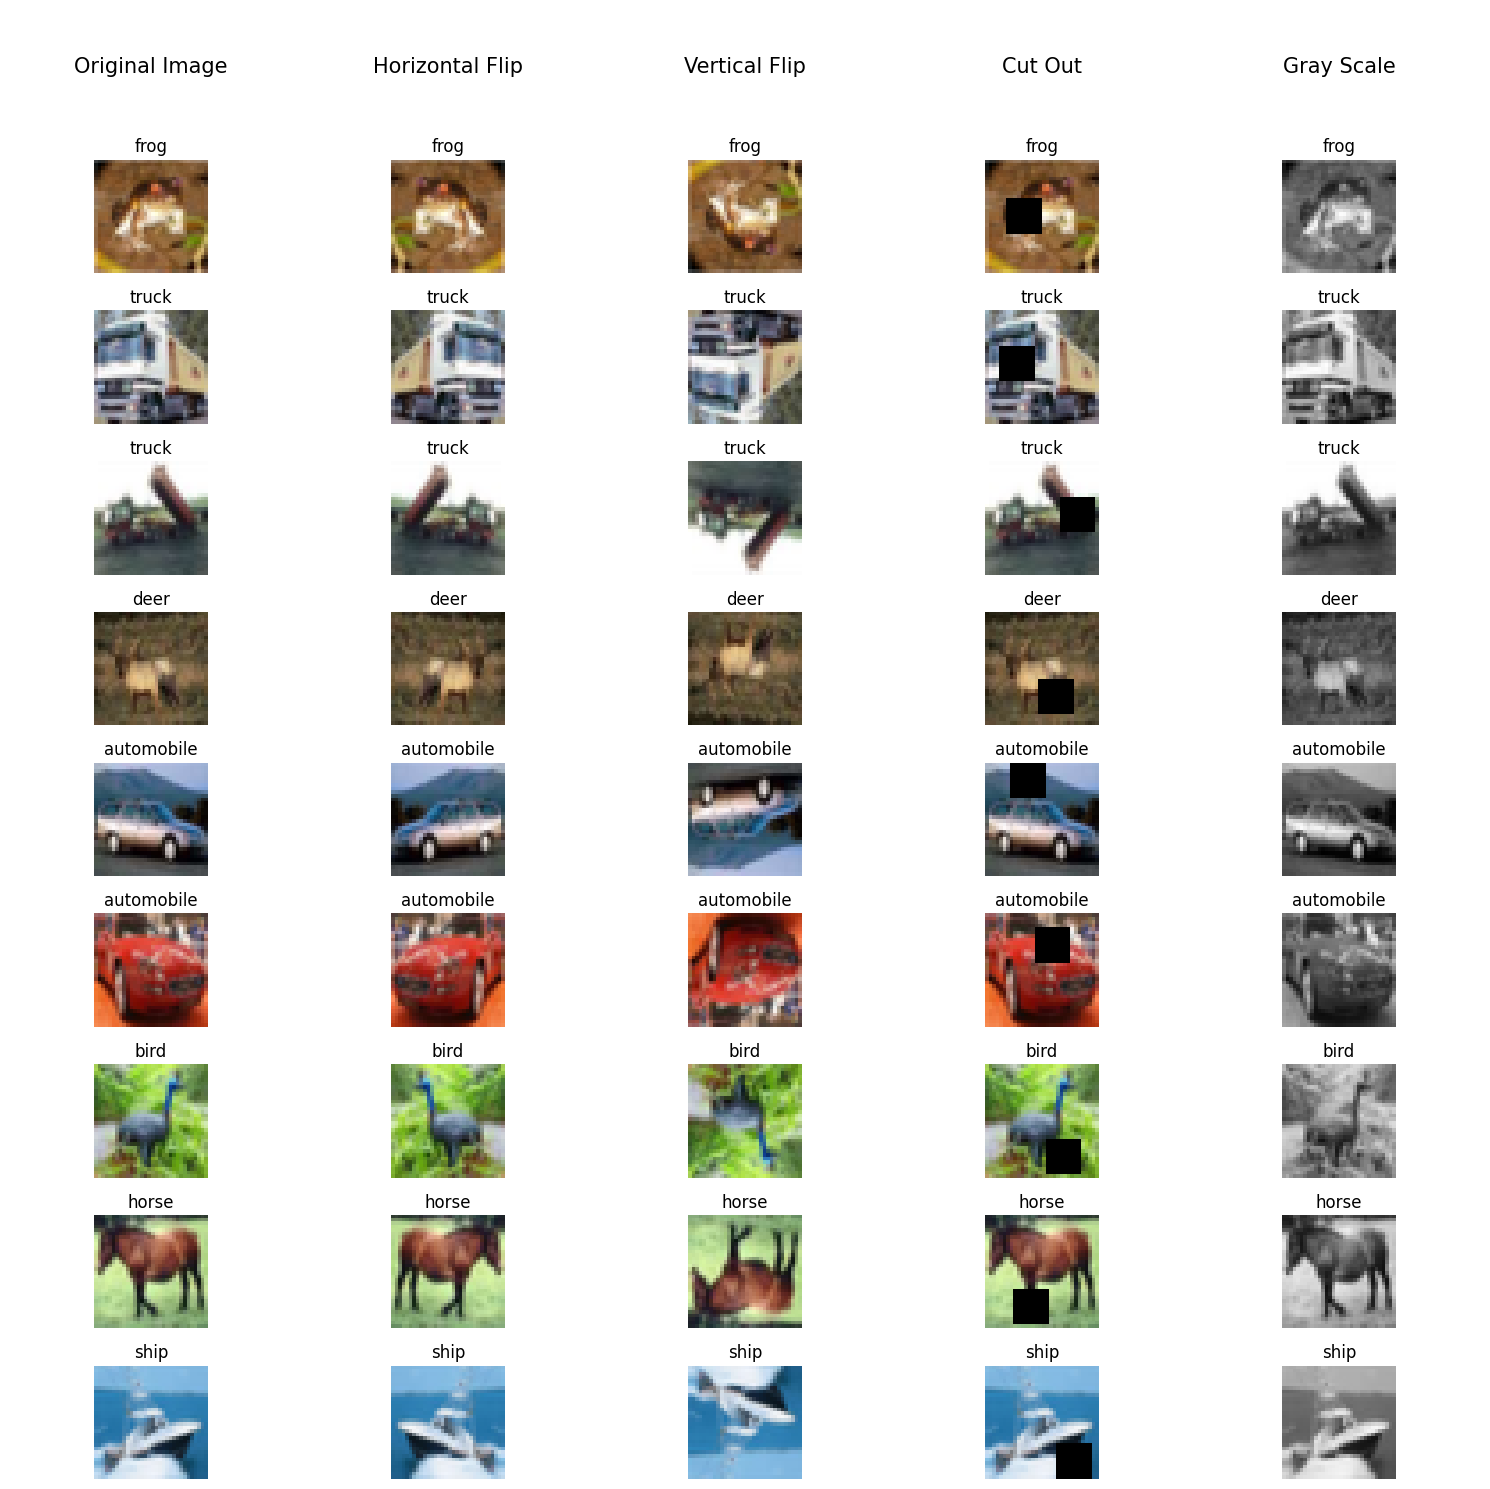

In [6]:
aug_details = {
    'Original Image': None,
    'Horizontal Flip': A.HorizontalFlip(always_apply=True),
    'Vertical Flip': A.VerticalFlip(always_apply=True),
    'Cut Out': A.CoarseDropout(max_holes=1, max_height=10, max_width=10, min_holes=1, min_height=10,
                               min_width=10, fill_value=0.473363, mask_fill_value=None, always_apply=True),
    'Gray Scale': A.ToGray(always_apply=True)
}

visualize_augmentated_images(sample,aug_details)

In [7]:
train_data = datasets.CIFAR10(root='./data', train=True,
                                        download=True )
test_data = datasets.CIFAR10(root='./data', train=False,
                                       download=True)


train_loader = torch.utils.data.DataLoader(AlbumentationImageDataset(train_data,(0.49139968, 0.48215841, 0.44653091),(0.24703223, 0.24348513, 0.26158784),train=True), batch_size=32,
                                          shuffle=True, num_workers=2)
test_loader = torch.utils.data.DataLoader(AlbumentationImageDataset(test_data,(0.49139968, 0.48215841, 0.44653091),(0.24703223, 0.24348513, 0.26158784),train=False), batch_size=32,
                                          shuffle=False, num_workers=1)

Files already downloaded and verified
Files already downloaded and verified


In [8]:
model = Net(norm_type="gn").to(device)
summary(model, input_size=(3, 32, 32))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 10, 32, 32]             270
              ReLU-2           [-1, 10, 32, 32]               0
         GroupNorm-3           [-1, 10, 32, 32]              20
           Dropout-4           [-1, 10, 32, 32]               0
            Conv2d-5           [-1, 20, 32, 32]           1,800
              ReLU-6           [-1, 20, 32, 32]               0
         GroupNorm-7           [-1, 20, 32, 32]              40
           Dropout-8           [-1, 20, 32, 32]               0
            Conv2d-9           [-1, 10, 34, 34]             200
             ReLU-10           [-1, 10, 34, 34]               0
        GroupNorm-11           [-1, 10, 34, 34]              20
          Dropout-12           [-1, 10, 34, 34]               0
        MaxPool2d-13           [-1, 10, 17, 17]               0
           Conv2d-14           [-1, 18,

In [9]:
training_parameters = {"learning_rate":0.01,
                       "momentum":0.7,
                       "max_lr":0.015,
                       "num_epochs":20
                       }
train_losses, test_losses, train_acc, test_acc = fit_model(model,training_parameters,train_loader,test_loader,device)

Adjusting learning rate of group 0 to 6.0000e-04.
Epoch 1


Train: Loss=1.6101 Batch_id=1562 Accuracy=28.04: 100%|██████████| 1563/1563 [00:28<00:00, 53.90it/s]


Test set: Average loss: 1.6167, Accuracy: 4204/10000 (42.04%)

Adjusting learning rate of group 0 to 6.0000e-04.
Epoch 2


Train: Loss=2.0082 Batch_id=1562 Accuracy=37.96: 100%|██████████| 1563/1563 [00:28<00:00, 54.21it/s]


Test set: Average loss: 1.4676, Accuracy: 4687/10000 (46.87%)

Adjusting learning rate of group 0 to 6.0000e-04.
Epoch 3


Train: Loss=1.3703 Batch_id=1562 Accuracy=42.79: 100%|██████████| 1563/1563 [00:28<00:00, 54.47it/s]


Test set: Average loss: 1.3518, Accuracy: 5252/10000 (52.52%)

Adjusting learning rate of group 0 to 6.0000e-04.
Epoch 4


Train: Loss=1.2678 Batch_id=1562 Accuracy=46.33: 100%|██████████| 1563/1563 [00:29<00:00, 52.85it/s]


Test set: Average loss: 1.2112, Accuracy: 5720/10000 (57.20%)

Adjusting learning rate of group 0 to 6.0001e-04.
Epoch 5


Train: Loss=1.2522 Batch_id=1562 Accuracy=48.89: 100%|██████████| 1563/1563 [00:29<00:00, 53.50it/s]


Test set: Average loss: 1.1745, Accuracy: 5787/10000 (57.87%)

Adjusting learning rate of group 0 to 6.0001e-04.
Epoch 6


Train: Loss=1.2456 Batch_id=1562 Accuracy=50.70: 100%|██████████| 1563/1563 [00:29<00:00, 52.10it/s]


Test set: Average loss: 1.1613, Accuracy: 5914/10000 (59.14%)

Adjusting learning rate of group 0 to 6.0001e-04.
Epoch 7


Train: Loss=1.5337 Batch_id=1562 Accuracy=52.25: 100%|██████████| 1563/1563 [00:29<00:00, 52.61it/s]


Test set: Average loss: 1.0319, Accuracy: 6415/10000 (64.15%)

Adjusting learning rate of group 0 to 6.0002e-04.
Epoch 8


Train: Loss=1.1747 Batch_id=1562 Accuracy=53.63: 100%|██████████| 1563/1563 [00:30<00:00, 51.78it/s]


Test set: Average loss: 1.0466, Accuracy: 6311/10000 (63.11%)

Adjusting learning rate of group 0 to 6.0003e-04.
Epoch 9


Train: Loss=1.0616 Batch_id=1562 Accuracy=54.68: 100%|██████████| 1563/1563 [00:31<00:00, 49.81it/s]


Test set: Average loss: 0.9736, Accuracy: 6608/10000 (66.08%)

Adjusting learning rate of group 0 to 6.0003e-04.
Epoch 10


Train: Loss=1.1722 Batch_id=1562 Accuracy=55.66: 100%|██████████| 1563/1563 [00:30<00:00, 51.87it/s]


Test set: Average loss: 0.9861, Accuracy: 6541/10000 (65.41%)

Adjusting learning rate of group 0 to 6.0004e-04.
Epoch 11


Train: Loss=1.4656 Batch_id=1562 Accuracy=56.42: 100%|██████████| 1563/1563 [00:30<00:00, 51.18it/s]


Test set: Average loss: 0.9573, Accuracy: 6700/10000 (67.00%)

Adjusting learning rate of group 0 to 6.0005e-04.
Epoch 12


Train: Loss=0.8761 Batch_id=1562 Accuracy=57.11: 100%|██████████| 1563/1563 [00:30<00:00, 52.03it/s]


Test set: Average loss: 0.9748, Accuracy: 6580/10000 (65.80%)

Adjusting learning rate of group 0 to 6.0006e-04.
Epoch 13


Train: Loss=1.3510 Batch_id=1562 Accuracy=57.44: 100%|██████████| 1563/1563 [00:30<00:00, 51.62it/s]


Test set: Average loss: 0.9200, Accuracy: 6800/10000 (68.00%)

Adjusting learning rate of group 0 to 6.0007e-04.
Epoch 14


Train: Loss=1.2709 Batch_id=1562 Accuracy=58.10: 100%|██████████| 1563/1563 [00:31<00:00, 50.03it/s]


Test set: Average loss: 0.9045, Accuracy: 6822/10000 (68.22%)

Adjusting learning rate of group 0 to 6.0008e-04.
Epoch 15


Train: Loss=1.2574 Batch_id=1562 Accuracy=58.55: 100%|██████████| 1563/1563 [00:30<00:00, 50.64it/s]


Test set: Average loss: 0.9013, Accuracy: 6869/10000 (68.69%)

Adjusting learning rate of group 0 to 6.0009e-04.
Epoch 16


Train: Loss=1.2266 Batch_id=1562 Accuracy=58.90: 100%|██████████| 1563/1563 [00:31<00:00, 50.39it/s]


Test set: Average loss: 0.8934, Accuracy: 6905/10000 (69.05%)

Adjusting learning rate of group 0 to 6.0010e-04.
Epoch 17


Train: Loss=1.7632 Batch_id=1562 Accuracy=59.42: 100%|██████████| 1563/1563 [00:33<00:00, 46.19it/s]


Test set: Average loss: 0.8783, Accuracy: 6906/10000 (69.06%)

Adjusting learning rate of group 0 to 6.0012e-04.
Epoch 18


Train: Loss=1.7033 Batch_id=1562 Accuracy=59.65: 100%|██████████| 1563/1563 [00:31<00:00, 49.41it/s]


Test set: Average loss: 0.8624, Accuracy: 7018/10000 (70.18%)

Adjusting learning rate of group 0 to 6.0013e-04.
Epoch 19


Train: Loss=0.8440 Batch_id=1562 Accuracy=59.65: 100%|██████████| 1563/1563 [00:32<00:00, 48.80it/s]


Test set: Average loss: 0.8461, Accuracy: 7066/10000 (70.66%)

Adjusting learning rate of group 0 to 6.0015e-04.
Epoch 20


Train: Loss=1.3896 Batch_id=1562 Accuracy=60.09: 100%|██████████| 1563/1563 [00:32<00:00, 48.76it/s]


Test set: Average loss: 0.8443, Accuracy: 7100/10000 (71.00%)

Adjusting learning rate of group 0 to 6.0016e-04.


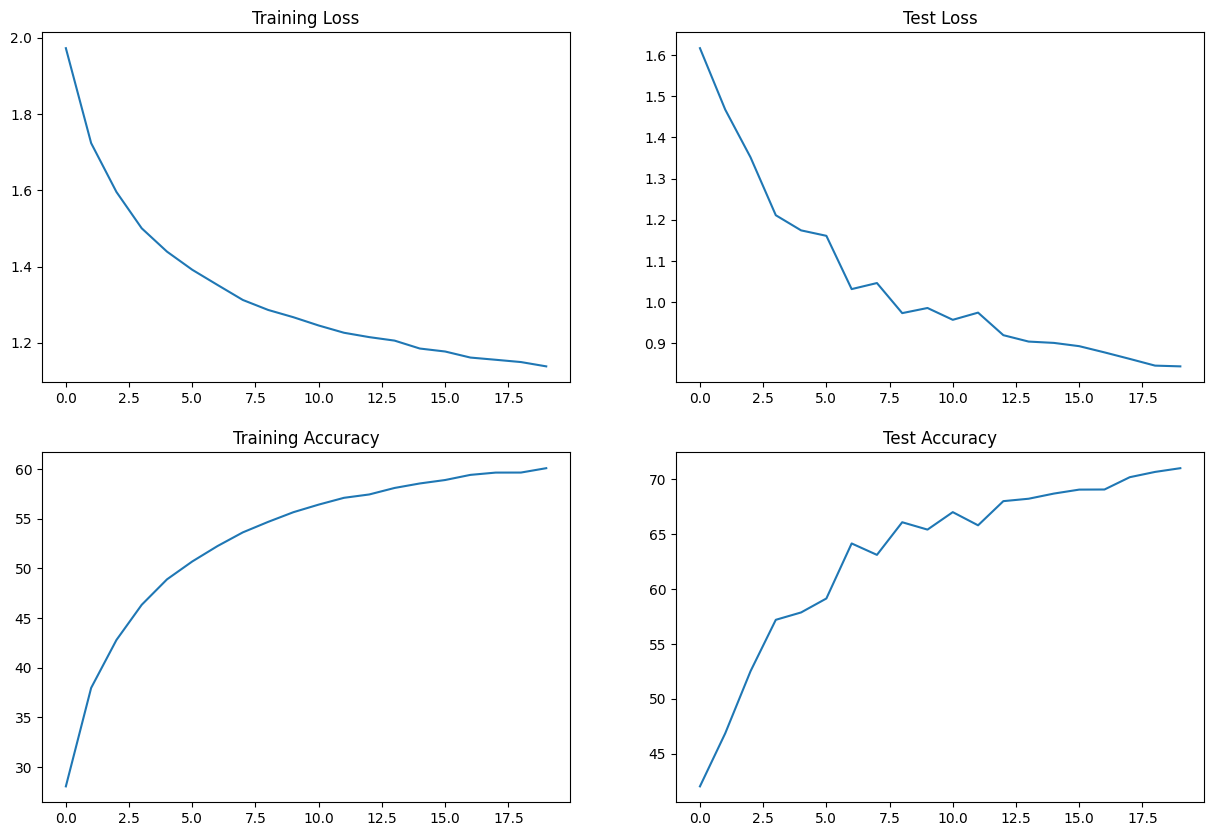

In [10]:
plot_accuracy_report(train_losses, test_losses, train_acc, test_acc)

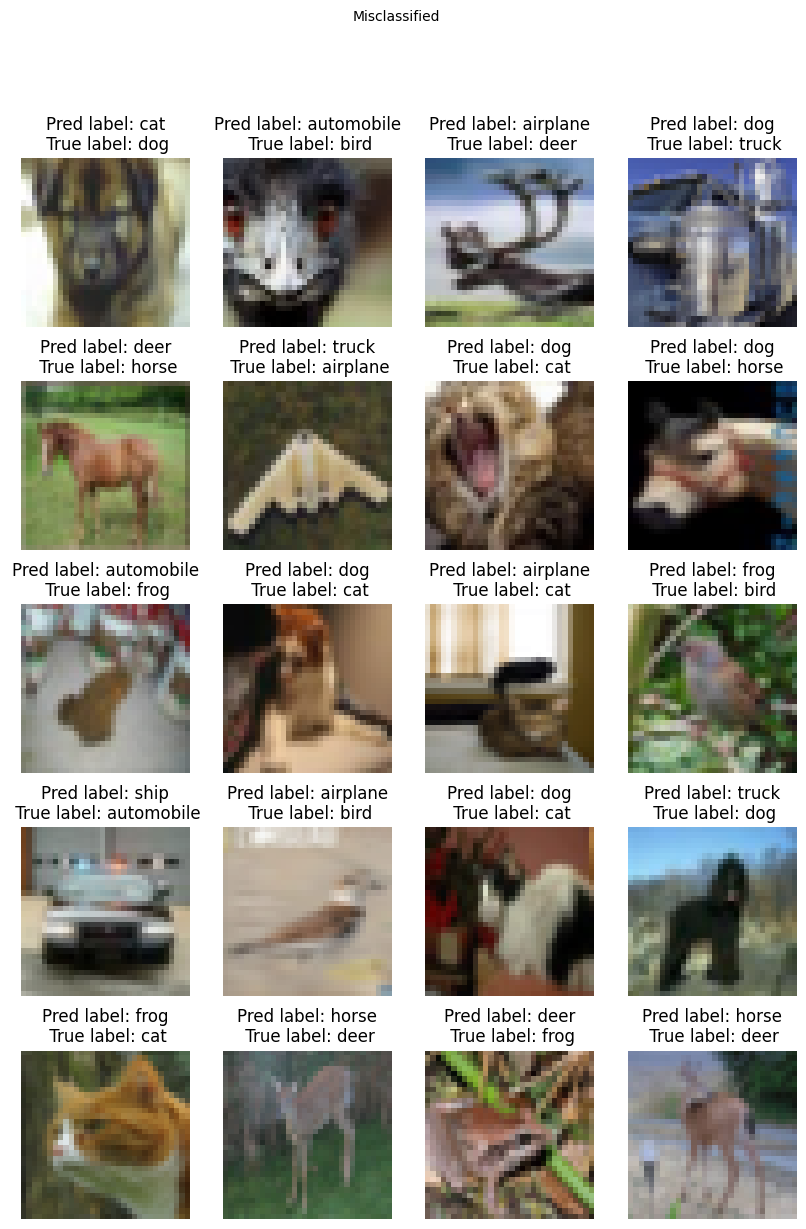

In [11]:
# from torchvision import transforms
# import matplotlib.pyplot as plt
# import numpy as np

grid_size = (4,4)
plot_misclassified(model,test_loader,test_data,device,mean,std)


Accuracy of airplane : 77 %

Accuracy of automobile : 88 %

Accuracy of  bird : 45 %

Accuracy of   cat : 51 %

Accuracy of  deer : 73 %

Accuracy of   dog : 66 %

Accuracy of  frog : 72 %

Accuracy of horse : 79 %

Accuracy of  ship : 78 %

Accuracy of truck : 85 %
{'airplane': 77.1523178807947, 'automobile': 88.62876254180603, 'bird': 45.23809523809524, 'cat': 51.62337662337662, 'deer': 73.20872274143302, 'dog': 66.13418530351437, 'frog': 72.36842105263158, 'horse': 79.48717948717949, 'ship': 78.41269841269842, 'truck': 85.0}


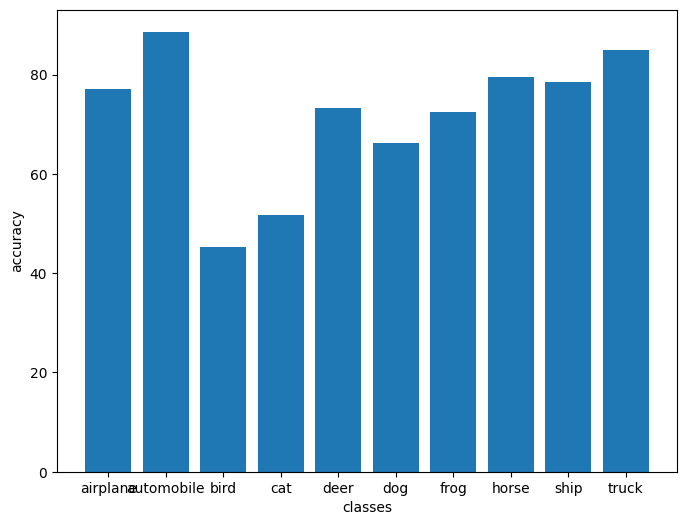

In [12]:
calculate_accuracy_per_class(model,device,test_loader,test_data)